In [38]:
import numpy as np

x = [[[10, 2, 1],
      [1, -8, 2],
      [2, 3, -9]],
    [[-12, 2, -3],
     [3, 9, 1],
     [-2, 1, 10]],
    [[11, -1, 3],
     [2, 7, -2],
     [3, 2, 9]],
    [[-10, 5, 1],
     [-4, 11, -3],
     [-2, 3, -8]],
    [[8, 1, -2],
     [-3, 10, 2],
     [-1, -2, 9]]]

y = [[40, 1150, 18],
    [25, -10, 15],
    [30, -10, 12],
    [80, -700, 140],
    [15, 10, -5]]

x = np.array(x)
y = np.array(y)

def diag_check(x):
    diag = np.abs(np.diag(x))
    non_diag = np.abs(np.sum(x, axis=1)) - diag
    for i in range(len(diag)):
        if diag[i] < non_diag[i]:
            return False
    return True

def gauss_seidel(x, y, e = 0.0001, n = 25):
    if not diag_check(x):
        return
    
    x = x.copy()
    old_guess = np.zeros(np.shape(x[0]))
    diag = np.diag(x).copy()
    np.fill_diagonal(x, 0)
    
    for i in range(n):
        new_guess = np.array(old_guess)
        for j, row in enumerate(x):
            new_guess[j] = (y[j] - np.dot(row, new_guess)) / diag[j]
        print(f"Iter #{i+1}: {new_guess}")
        
        euclidean_distance = np.sqrt(np.dot(new_guess-old_guess, new_guess-old_guess))
        old_guess = new_guess
        if euclidean_distance < e:
            print("Converged")
            return

for i in range(len(x)):
    print(f"Equation #{i+1}:")
    gauss_seidel(x[i], y[i])
    print("\n")
    


Equation #1:
Iter #1: [   4.         -143.25        -48.86111111]
Iter #2: [  37.53611111 -151.27326389  -44.08306327]
Iter #3: [  38.6629591  -149.93789593  -43.38752995]
Iter #4: [  38.32633218 -149.80609097  -43.41840095]
Iter #5: [  38.30305829 -149.81671795  -43.42711525]
Iter #6: [  38.30605512 -149.81852192  -43.42705062]
Iter #7: [  38.30640945 -149.81846147  -43.42695173]
Iter #8: [  38.30638747 -149.8184395   -43.42694928]
Converged


Equation #2:
Iter #1: [-2.08333333 -0.41666667  1.125     ]
Iter #2: [-2.43402778 -0.42476852  1.0556713 ]
Iter #3: [-2.41804591 -0.42239262  1.05863008]
Iter #4: [-2.41838962 -0.4226068   1.05858276]
Iter #5: [-2.41841349 -0.42259359  1.05857666]
Converged


Equation #3:
Iter #1: [ 2.72727273 -2.20779221  0.91486291]
Iter #2: [ 2.27705628 -1.81776953  0.97826336]
Iter #3: [ 2.29522185 -1.80484528  0.96933611]
Iter #4: [ 2.29883149 -1.80842725  0.96892889]
Iter #5: [ 2.29861692 -1.80848229  0.96901265]
Iter #6: [ 2.29858907 -1.80845041  0.969014

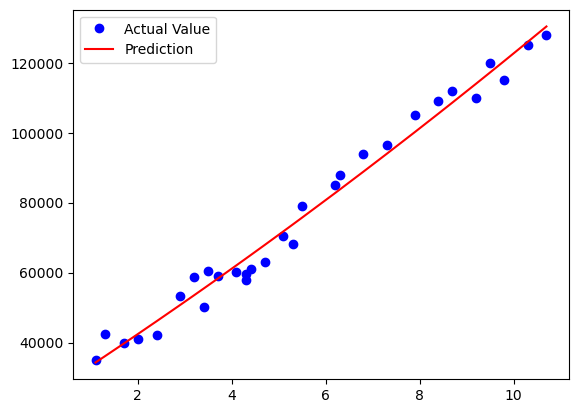

In [48]:
import numpy as np
import matplotlib.pyplot as plt

x = [1.1, 1.3, 1.7, 2.0, 2.4, 2.9, 3.2, 3.4, 3.5, 3.7, 4.1, 4.3, 4.3, 4.4, 4.7, 5.1,
        5.3, 5.5, 6.2, 6.3, 6.8, 7.3, 7.9, 8.4, 8.7, 9.2, 9.5, 9.8, 10.3, 10.7]

y = [35010.0, 42500.0, 39800.0, 41050.0, 42100.0, 53200.0, 58700.0, 50200.0, 60500.0, 59000.0,
        60100.0, 58000.0, 59500.0, 61000.0, 63000.0, 70500.0, 68200.0, 79000.0, 85000.0, 88000.0,
        94000.0, 96500.0, 105000.0, 109000.0, 112000.0, 110000.0, 120000.0, 115000.0, 125000.0, 128000.0]

x = np.array(x)
y = np.array(y)

A = np.vstack([x**2, x, np.ones(len(x))]).T
C = np.dot(np.linalg.pinv(A), y)

y_pred = C[0]*x**2 + C[1]*x + C[2]

plt.plot(x, y, "ob")
plt.plot(x, y_pred, "-r")
plt.legend(["Actual Value", "Prediction"])
plt.show()

In [57]:
import numpy as np

def f(x):
    return 15 * x**5 + 6 * x**4 - 9
def g(x):
    return 75 * x**4 + 24 * x**3

def raphson(x0, i = 1, tol = 0.001):
    x1 = x0 - (f(x0)/g(x0))
    print(f"Root {i}: {x1}, with result ({f(x1)})")
    if np.abs(f(x1)) < tol:
        print(f"The root is {x1}")
        return
    
    raphson(x1, i+1)
        
raphson(8)


Root 1: 6.3846435546875, with result (169099.29858840207)
Root 2: 5.09254726304843, with result (55403.192586619865)
Root 3: 4.059151631090866, with result (18149.693531593177)
Root 4: 3.232900199475833, with result (5943.698940756856)
Root 5: 2.5727608245166196, with result (1944.659549977975)
Root 6: 2.0464145569027368, with result (634.5699789766905)
Root 7: 1.6292123652688355, with result (205.45172775973177)
Root 8: 1.30423262751473, with result (64.96740405327364)
Root 9: 1.0638401694682167, with result (19.12486579284604)
Root 10: 0.9107941475801595, with result (4.530276696780156)
Root 11: 0.8458384354552855, with result (0.5653892516437526)
Root 12: 0.8351531613377488, with result (0.013149836921524383)
Root 13: 0.8348925932988748, with result (7.635029596997356e-06)
The root is 0.8348925932988748


In [82]:
import numpy as np

def f(x):
    return x**4 - 13 * x**3 + 36

x_min = -2
x_max = 2
n = 51

x = np.linspace(x_min, x_max, n)
width = x[1] - x[0]

# left riemman
total_length = np.sum(f(x[0:n-1]))
area = total_length * width
print(area)

# right riemman
total_length = np.sum(f(x[1:n]))
area = total_length * width
print(area)

# mid riemman
mid = (x[1:n] + x[0:n-1]) / 2 
total_length = (np.sum(f(mid))) 
area = total_length * width
print(area)

# trapesium riemman
a = np.sum(f(x[0:n-1]))
b = np.sum(f(x[1:n]))
area =  width * (a + b) / 2
print(area)



165.15412787200015
148.51412787200013
156.78293811200012
156.83412787200012
